In [1]:
import cftime
import datetime
import glob
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import pandas as pd
from scipy import stats
from scipy import io

import mission_tools

%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
mission_21_df = pd.read_csv('../data/case_studys/mission21_casestudy_data.csv')
mission_19_df = pd.read_csv('../data/case_studys/mission19_casestudy_data.csv')


In [7]:
mission19_mean_time = datetime.datetime(year=2021, month=10, day=8, hour=18, minute=30)
mission21_mean_time = datetime.datetime(year=2021, month=10, day=10, hour=14, minute=13)
bathy_time_20211008 = datetime.datetime(year=2021, month=10, day=8, hour=0, minute=0)
bathy_time_20211006 = datetime.datetime(year=2021, month=10, day=6, hour=0, minute=0)
bathy_time_202110013 = datetime.datetime(year=2021, month=10, day=13, hour=0, minute=0)

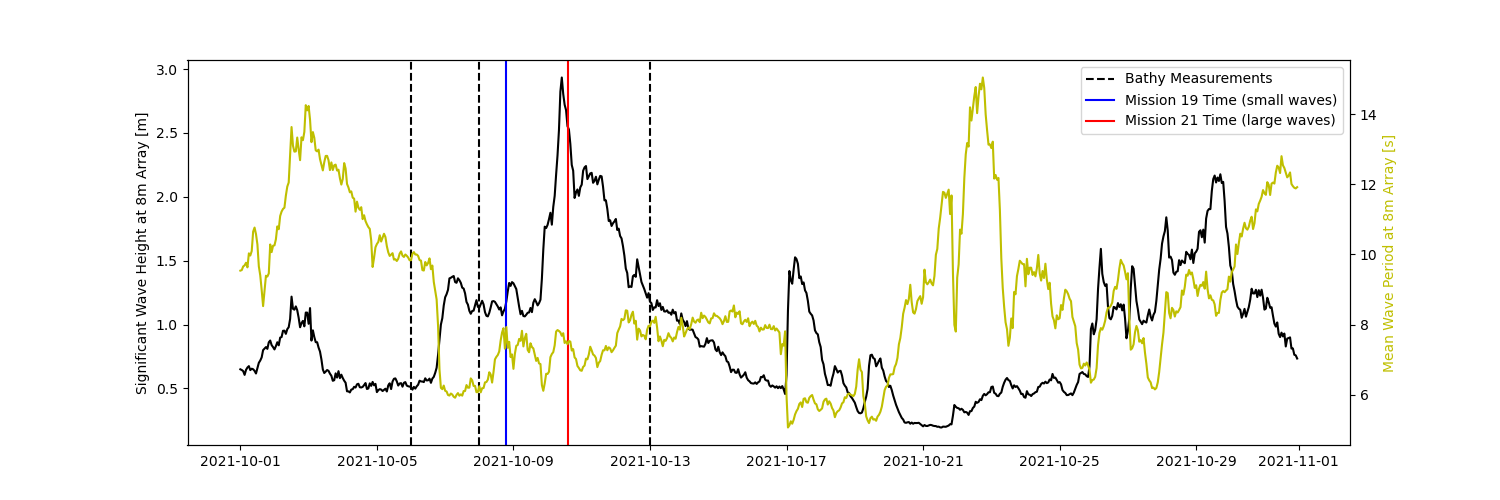

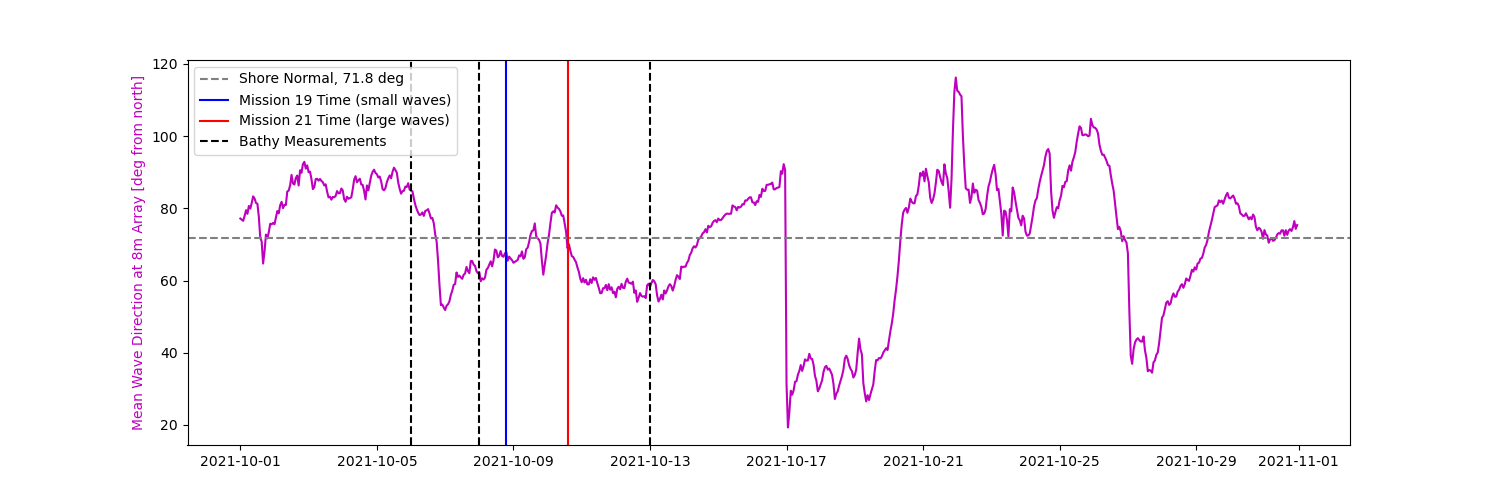

In [17]:
# Offshore Conditions during the mission - Using 8 m array
offshore_waves_dataset = nc.Dataset('../data/FRFdata/FRF-ocean_waves_8m-array_202110.nc')
offshore_waves_time = offshore_waves_dataset['time'][:]
offshore_waves_time_datetime = cftime.num2pydate(offshore_waves_time, 
                                units=offshore_waves_dataset['time'].units,
                                calendar=offshore_waves_dataset['time'].calendar)
Hs_offshore = offshore_waves_dataset['waveHs'][:]
Tm_offshore = offshore_waves_dataset['waveTm'][:]
mean_dir_offshore = offshore_waves_dataset['waveMeanDirection'][:]

fig, ax1 = plt.subplots(figsize=(15,5))
ax1.plot(offshore_waves_time_datetime, Hs_offshore, color='k')
ax1.set_ylabel('Significant Wave Height at 8m Array [m]')
ax1.axvline(bathy_time_20211008, color='k', linestyle='dashed', label='Bathy Measurements')
ax1.axvline(bathy_time_20211006, color='k', linestyle='dashed')
ax1.axvline(bathy_time_202110013, color='k', linestyle='dashed')
ax1.axvline(mission19_mean_time, color='b', label='Mission 19 Time (small waves)')
ax1.axvline(mission21_mean_time, color='r', label='Mission 21 Time (large waves)')
ax1.legend()

ax2 = ax1.twinx() 
ax2.plot(offshore_waves_time_datetime, Tm_offshore, color='y')
ax2.set_ylabel('Mean Wave Period at 8m Array [s]', color='y')

fig, ax3 = plt.subplots(figsize=(15,5))
ax3.plot(offshore_waves_time_datetime, mean_dir_offshore, color='m')
ax3.set_ylabel('Mean Wave Direction at 8m Array [deg from north]', color='m')
ax3.axhline(71.8, color='gray', linestyle='dashed', label='Shore Normal, 71.8 deg')
ax3.axvline(mission19_mean_time, color='b', label='Mission 19 Time (small waves)')
ax3.axvline(mission21_mean_time, color='r', label='Mission 21 Time (large waves)')
ax3.axvline(bathy_time_20211008, color='k', linestyle='dashed', label='Bathy Measurements')
ax3.axvline(bathy_time_20211006, color='k', linestyle='dashed')
ax3.axvline(bathy_time_202110013, color='k', linestyle='dashed')
ax3.legend()

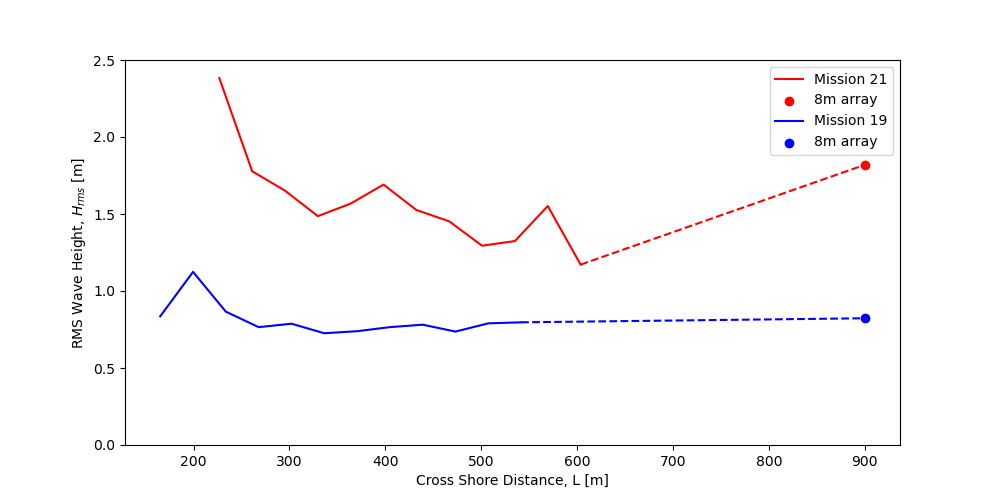

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
# Mission 21 - Large Waves
ax.plot(mission_21_df['cross_shore_bin_centers'], 
        mission_21_df['h_rms'], color='r', 
        label='Mission 21')

ax.scatter(900, mission_21_df['Hs_offshore'][0]/1.4, 
           color='r', label='8m array')

ax.plot([mission_21_df['cross_shore_bin_centers'].iloc[-1], 900], 
        [mission_21_df['h_rms'].iloc[-1], mission_21_df['Hs_offshore'][0]/1.4], 
        color='r', linestyle='dashed')

# Mission 19 - Small Waves
ax.plot(mission_19_df['cross_shore_bin_centers'], 
        mission_19_df['h_rms'], color='b', 
        label='Mission 19')

ax.scatter(900, mission_19_df['Hs_offshore'][0]/1.4, 
           color='b', label='8m array')

ax.plot([mission_19_df['cross_shore_bin_centers'].iloc[-1], 900], 
        [mission_19_df['h_rms'].iloc[-1], mission_19_df['Hs_offshore'][0]/1.4], 
        color='b', linestyle='dashed')

# Figure Properties
ax.set_xlabel('Cross Shore Distance, L [m]')
ax.set_ylabel('RMS Wave Height, $H_{rms}$ [m]')
ax.set_ylim(0, 2.5)
ax.legend()

/var/folders/tj/6lfp4z413tg03k2fzx57134c0000gn/T/ipykernel_80865/1188723286.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10,5))


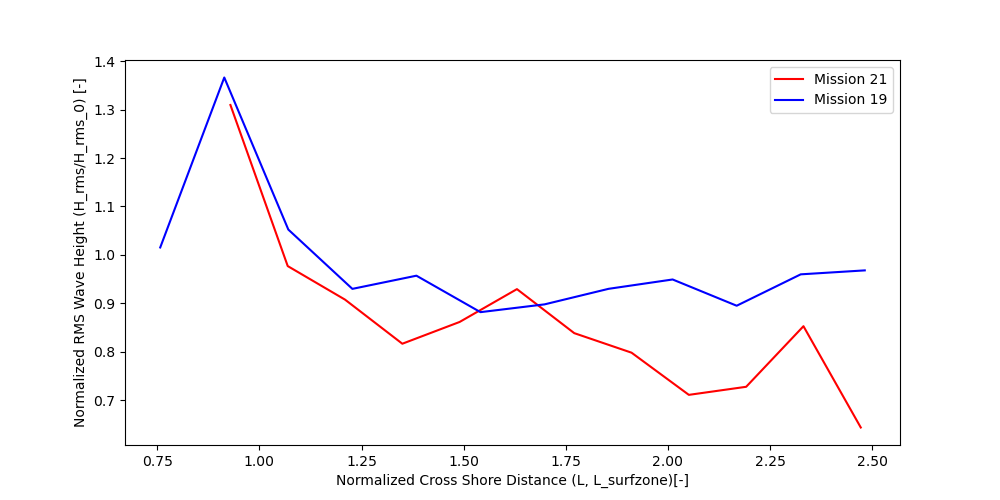

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(mission_21_df['cross_shore_bin_centers']/mission_21_df['x_surfzone'][0], 
        mission_21_df['h_rms']/(mission_21_df['Hs_offshore']/1.4), color='r', 
        label='Mission 21')
ax.plot(mission_19_df['cross_shore_bin_centers']/mission_19_df['x_surfzone'][0], 
        mission_19_df['h_rms']/(mission_19_df['Hs_offshore']/1.4), color='b', 
        label='Mission 19')
ax.set_xlabel('Normalized Cross Shore Distance (L, L_surfzone)[-]')
ax.set_ylabel('Normalized RMS Wave Height (H_rms/H_rms_0) [-]')
ax.legend()